In [5]:
import pandas as pd

purchase_df = pd.read_csv("../data/QVI_purchase_behaviour.csv")
transaction_data = pd.read_excel("../data/QVI_transaction_data.xlsx", sheet_name=None)

In [6]:
transaction_data.keys()

dict_keys(['in'])

In [7]:
transaction_df = transaction_data['in']

In [8]:
# Examining transaction data
print(transaction_df.info())
print(transaction_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB
None
    DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   
3  43329          2            2373     974        69   
4  43330          2            2426    1038       108   

                   

In [9]:
# Examining customer data
print(purchase_df.info())
print(purchase_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None
   LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0            1000   YOUNG SINGLES/COUPLES          Premium
1            1002   YOUNG SINGLES/COUPLES       Mainstream
2            1003          YOUNG FAMILIES           Budget
3            1004   OLDER SINGLES/COUPLES       Mainstream
4            1005  MIDAGE SINGLES/COUPLES       Mainstream


In [10]:
# converting "DATE" column to the readable format
transaction_df["DATE"] = pd.to_datetime(transaction_df["DATE"], origin="1899-12-30", unit="D")
print(transaction_df["DATE"])

0        2018-10-17
1        2019-05-14
2        2019-05-20
3        2018-08-17
4        2018-08-18
            ...    
264831   2019-03-09
264832   2018-08-13
264833   2018-11-06
264834   2018-12-27
264835   2018-09-22
Name: DATE, Length: 264836, dtype: datetime64[ns]


In [11]:
# Extracting chip products 

from collections import Counter
import re

product_words = Counter(re.findall(r'\b[A-Za-z]+\b', ' '.join(transaction_df['PROD_NAME'].unique())))

print(product_words)

# Remove digits and special characters
filtered_words = {word: count for word, count in product_words.items() if word.isalpha()}

sorted_words = sorted(filtered_words.items(), key=lambda x: x[1], reverse=True)

# Remove salsa products and explicitly create a copy
transaction_df = transaction_df[~transaction_df['PROD_NAME'].str.contains("salsa", case=False)].copy()

transaction_df["PROD_NAME"] = transaction_df["PROD_NAME"].str.replace(r"[^a-zA-Z0-9 ]", "", regex=True)
print(transaction_df["PROD_NAME"])

Counter({'Chips': 21, 'Smiths': 16, 'Crinkle': 14, 'Cut': 14, 'Kettle': 13, 'Cheese': 12, 'Salt': 12, 'Original': 10, 'Chip': 9, 'Salsa': 9, 'Doritos': 9, 'Corn': 8, 'Pringles': 8, 'RRD': 8, 'Chicken': 7, 'Cream': 7, 'Chilli': 7, 'WW': 7, 'Sour': 6, 'Sea': 6, 'Thinly': 5, 'Vinegar': 5, 'Thins': 5, 'Crisps': 5, 'Natural': 4, 'Sweet': 4, 'Chives': 4, 'Lime': 4, 'Red': 4, 'Rock': 4, 'Deli': 4, 'Supreme': 4, 'Infuzions': 4, 'CCs': 3, 'Tortilla': 3, 'Old': 3, 'El': 3, 'Paso': 3, 'Dip': 3, 'Tomato': 3, 'Mild': 3, 'Sensations': 3, 'Twisties': 3, 'BBQ': 3, 'Swt': 3, 'Soy': 3, 'Cobs': 3, 'Popd': 3, 'Woolworths': 3, 'Tostitos': 3, 'Nacho': 2, 'S': 2, 'Onion': 2, 'Grain': 2, 'Waves': 2, 'Tangy': 2, 'Burger': 2, 'Rings': 2, 'Cheezels': 2, 'And': 2, 'Thai': 2, 'SR': 2, 'French': 2, 'ChipCo': 2, 'Smith': 2, 'Honey': 2, 'Tyrrells': 2, 'Lightly': 2, 'Salted': 2, 'Medium': 2, 'SourCream': 2, 'Chs': 2, 'Potato': 2, 'Cheetos': 2, 'Garlic': 2, 'Compny': 1, 'ChpsHny': 1, 'Jlpno': 1, 'Chili': 1, 'Mexican': 

In [12]:
# Checking for nulls
print(transaction_df.isnull().sum())

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64


In [13]:
# Checking for outliers
print(transaction_df.describe())
print(purchase_df.describe())

                                DATE      STORE_NBR  LYLTY_CARD_NBR  \
count                         246742  246742.000000    2.467420e+05   
mean   2018-12-30 01:19:01.211467520     135.051098    1.355310e+05   
min              2018-07-01 00:00:00       1.000000    1.000000e+03   
25%              2018-09-30 00:00:00      70.000000    7.001500e+04   
50%              2018-12-30 00:00:00     130.000000    1.303670e+05   
75%              2019-03-31 00:00:00     203.000000    2.030840e+05   
max              2019-06-30 00:00:00     272.000000    2.373711e+06   
std                              NaN      76.787096    8.071528e+04   

             TXN_ID       PROD_NBR       PROD_QTY      TOT_SALES  
count  2.467420e+05  246742.000000  246742.000000  246742.000000  
mean   1.351311e+05      56.351789       1.908062       7.321322  
min    1.000000e+00       1.000000       1.000000       1.700000  
25%    6.756925e+04      26.000000       2.000000       5.800000  
50%    1.351830e+05      

In [14]:
# Product quantity appears to have an outlier
# Investigate further the case where 200 packets of chips are bought in one transaction


outliers = transaction_df[transaction_df['PROD_QTY'] == 200]
outliers

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [ ]:
# There are two transactions where 200 packets of chips are bought in one transaction and both of these
# transactions were by the same customer

# Checking if this customer had other transactions

transaction_df[transaction_df['LYLTY_CARD_NBR'] == 226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [ ]:
# It looks like this customer has only two transactions over the year
# It is not ordinary retail customer, let's remove the outliers

excluded_customer = outliers['LYLTY_CARD_NBR'].iloc[0]

transaction_df = transaction_df[transaction_df['LYLTY_CARD_NBR'] != excluded_customer]
print(transaction_df.describe())

                                DATE      STORE_NBR  LYLTY_CARD_NBR  \
count                         246740  246740.000000    2.467400e+05   
mean   2018-12-30 01:18:58.448569344     135.050361    1.355303e+05   
min              2018-07-01 00:00:00       1.000000    1.000000e+03   
25%              2018-09-30 00:00:00      70.000000    7.001500e+04   
50%              2018-12-30 00:00:00     130.000000    1.303670e+05   
75%              2019-03-31 00:00:00     203.000000    2.030832e+05   
max              2019-06-30 00:00:00     272.000000    2.373711e+06   
std                              NaN      76.786971    8.071520e+04   

             TXN_ID       PROD_NBR       PROD_QTY      TOT_SALES  
count  2.467400e+05  246740.000000  246740.000000  246740.000000  
mean   1.351304e+05      56.352213       1.906456       7.316113  
min    1.000000e+00       1.000000       1.000000       1.700000  
25%    6.756875e+04      26.000000       2.000000       5.800000  
50%    1.351815e+05      

In [15]:
# Number of transaction lines over time
transactions_by_day = transaction_df.groupby('DATE').size().reset_index(name='Transaction_Count')
transactions_by_day 

,DATE,Transaction_Count
0,2018-07-01,663
1,2018-07-02,650
2,2018-07-03,674
3,2018-07-04,669
4,2018-07-05,660
...,...,...
359,2019-06-26,657
360,2019-06-27,669
361,2019-06-28,673
362,2019-06-29,703


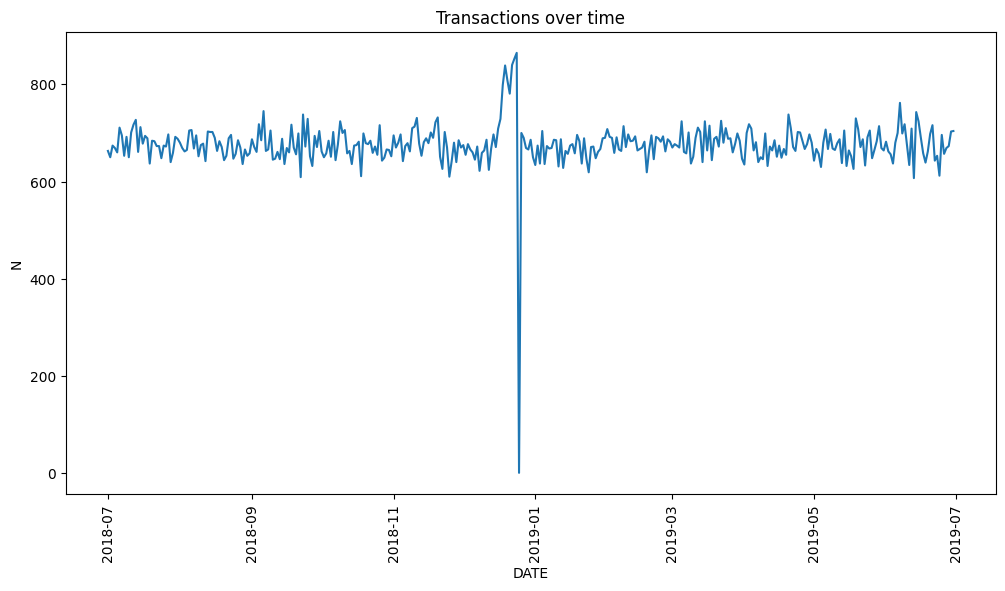

In [16]:
# There is only 364 rows, meaning missing date
# Let's see number of transactions over time and find missing date

import matplotlib.pyplot as plt
import seaborn as sns


date_range = pd.date_range(start="2018-07-01", end="2019-06-30")
all_dates = pd.DataFrame(date_range, columns=["DATE"])
transactions_by_day = all_dates.merge(transaction_df.groupby("DATE").size().reset_index(name="N"), on="DATE", how="left").fillna(0)


plt.figure(figsize=(12, 6))
sns.lineplot(data=transactions_by_day, x="DATE", y="N")
plt.xticks(rotation=90)
plt.title("Transactions over time")
plt.show()


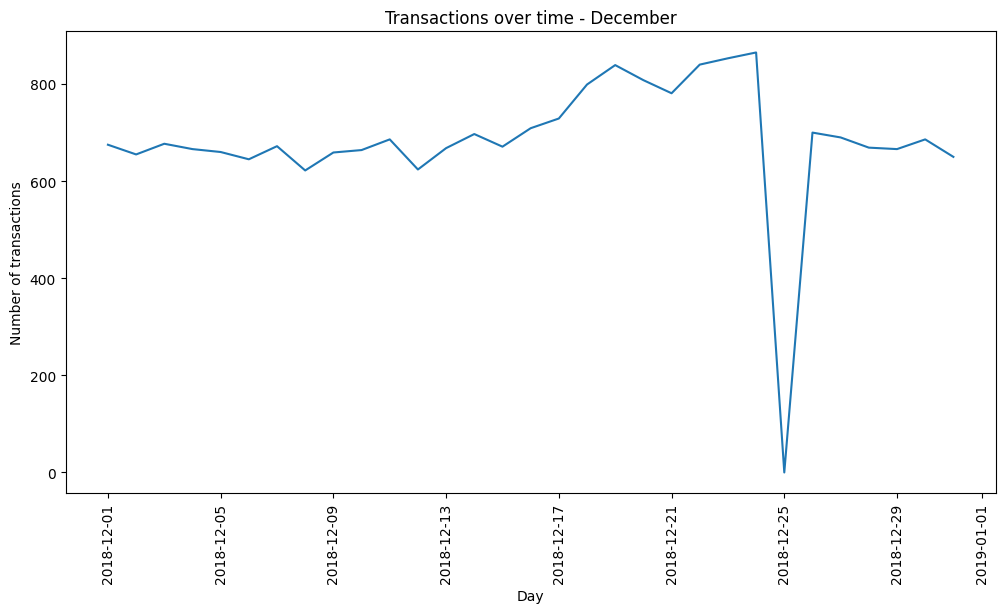

In [17]:
# We see increase in purchases and break in December
# Let's Zoom in December and look at individual days

december_data = transactions_by_day[transactions_by_day["DATE"].dt.month == 12]
plt.figure(figsize=(12, 6))
sns.lineplot(data=december_data, x="DATE", y="N")
plt.xticks(rotation=90)
plt.xlabel("Day")
plt.ylabel("Number of transactions")
plt.title("Transactions over time - December")
plt.show()

In [18]:
# We see that there are zero purchases on 25th of December, 2018, which is the Christmas day.